This notebook takes 1 March - 31 October. It uses 4 weeks of data to predict the next 2 weeks

In [1]:
import numpy as np
import matplotlib.pylab as plt
from pandas import read_csv
import matplotlib.pyplot
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from datetime import date, timedelta
from sklearn.metrics import r2_score

In [2]:
cases = pd.read_csv("time_series_covid19_confirmed_US.csv")
deaths  = pd.read_csv("time_series_covid19_deaths_US.csv")
density = pd.read_csv("popden.csv")

In [3]:
fips = cases[(cases['10/31/20']<10000)]
fips = fips[(fips['10/31/20']>1000)]

f = fips['FIPS'].tolist()
cases = cases[cases['FIPS'].isin(f)]
deaths = deaths[deaths['FIPS'].isin(f)]

In [4]:
density.drop_duplicates(subset=['fips'],keep='last',inplace=True)

strings = {'NMR','PR','VI','KSC','NYC'}
index_names = density[(density['fips']).isin(strings)].index
density.drop(index_names, inplace=True)

density['fips']=density['fips'].astype(float)

In [5]:
c = pd.merge(cases,density, left_on='FIPS',right_on='fips')
d = pd.merge(deaths,density, left_on='FIPS',right_on='fips')

In [6]:
col = {'UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key','date','county','state','fips','cases','deaths','stay_at_home_announced','stay_at_home_effective','lat','lon','total_population','area_sqmi'}
c.drop(c.columns[c.columns.isin(col)],axis=1,inplace=True)
d.drop(d.columns[d.columns.isin(col)],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import minmax_scale
d['population_density_per_sqmi']=minmax_scale(d['population_density_per_sqmi'])
c['population_density_per_sqmi']=minmax_scale(c['population_density_per_sqmi'])

In [8]:
cases.fillna(0,inplace=True)
deaths.fillna(0,inplace=True)

deaths_results_MAE = np.zeros(15)
cases_results_MAE = np.zeros(15)

deaths_results_RMSE = np.zeros(15)
cases_results_RMSE = np.zeros(15)

deaths_score = np.zeros(15)
cases_score = np.zeros(15)

In [9]:
x_date = date(2020,3,1)
y_date = date(2020,3,29)
delta = timedelta(days=14)

for j in range (0,15):
    
    x_days = {x_date.strftime("%-m/%-d/%y")}
    for i in range(1,28):
        s = x_date + timedelta(days=i)
        x_days.add(s.strftime("%-m/%-d/%y"))
    y_days = {y_date.strftime("%-m/%-d/%y")}
    for i in range(1,14):
        s = y_date + timedelta(days=i)
        y_days.add(s.strftime("%-m/%-d/%y"))
       
    x = deaths.filter(x_days)
    y = deaths.filter(y_days)
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
    reg = MLPRegressor(random_state=1, max_iter=1600).fit(X_train,y_train)
    deaths_results_MAE[j]=mean_absolute_error(y_test.astype(int),reg.predict(X_test).astype(int))
    deaths_results_RMSE[j]=mean_squared_error(y_test.astype(int),reg.predict(X_test).astype(int),squared='False')
    deaths_score[j] = r2_score(y_test,reg.predict(X_test))
    x_date += delta
    y_date += delta

In [10]:
x_date = date(2020,3,1)
y_date = date(2020,3,29)
delta = timedelta(days=14)

for j in range (0,15):
    
    x_days = {x_date.strftime("%-m/%-d/%y")}
    for i in range(1,28):
        s = x_date + timedelta(days=i)
        x_days.add(s.strftime("%-m/%-d/%y"))
    y_days = {y_date.strftime("%-m/%-d/%y")}
    for i in range(1,14):
        s = y_date + timedelta(days=i)
        y_days.add(s.strftime("%-m/%-d/%y"))
       
    x = cases.filter(x_days)
    y = cases.filter(y_days)
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
    reg = MLPRegressor(random_state=1, max_iter=1800).fit(X_train,y_train)
    cases_results_MAE[j]=mean_absolute_error(y_test.astype(int),reg.predict(X_test).astype(int))
    cases_results_RMSE[j]=mean_squared_error(y_test.astype(int),reg.predict(X_test).astype(int),squared='False')
    cases_score[j] = r2_score(y_test,reg.predict(X_test))
    x_date += delta
    y_date += delta

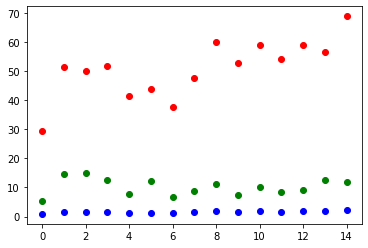

In [24]:
x_axis = np.arange(0,15)
plt.plot(x_axis,deaths_results_MAE,'bo')
plt.plot(x_axis,deaths_results_RMSE,'go')
plt.plot(x_axis,deaths_results_MAE*math.sqrt(len(x)),'ro')

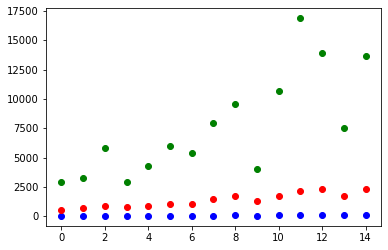

In [25]:
import math
plt.plot(x_axis,cases_results_MAE,'bo')
plt.plot(x_axis,cases_results_RMSE,'go')
plt.plot(x_axis,cases_results_MAE*math.sqrt(len(x)),'ro')

In [13]:
cases_results_RMSE

array([ 2931.25795531,  3258.18280298,  5816.00236967,  2927.0450237 ,
        4257.64285714,  5950.58700068,  5352.08192282,  7969.53588355,
        9580.13405552,  4063.75964794, 10660.49932295, 16895.25253893,
       13886.46953284,  7512.39065674, 13653.93398781])

In [14]:
deaths_results_RMSE

array([ 5.41841571, 14.47224103, 14.91503047, 12.64387271,  7.67366283,
       12.09140149,  6.5802302 ,  8.8689912 , 11.10900474,  7.33852404,
       10.05619499,  8.59140149,  9.11340555, 12.3943805 , 11.96987136])

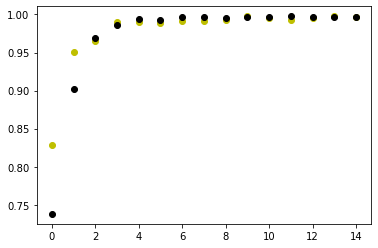

In [15]:
plt.plot(x_axis,cases_score,'yo')
plt.plot(x_axis,deaths_score,'ko')

In [16]:
deaths_results_MAE

array([0.90453622, 1.5859851 , 1.53859174, 1.58903182, 1.27014218,
       1.352065  , 1.1563981 , 1.46682464, 1.84969533, 1.62085308,
       1.80974949, 1.66316858, 1.81279621, 1.73493568, 2.11814489])

In [17]:
deaths_results_RMSE

array([ 5.41841571, 14.47224103, 14.91503047, 12.64387271,  7.67366283,
       12.09140149,  6.5802302 ,  8.8689912 , 11.10900474,  7.33852404,
       10.05619499,  8.59140149,  9.11340555, 12.3943805 , 11.96987136])

In [18]:
cases_results_MAE

array([16.96885579, 22.55788761, 27.06939743, 23.59884902, 26.09918754,
       30.72850372, 32.14218009, 45.86628301, 53.75084631, 39.89911984,
       53.02200406, 65.86662153, 70.70379147, 53.03723764, 71.25084631])

In [19]:
cases_results_RMSE

array([ 2931.25795531,  3258.18280298,  5816.00236967,  2927.0450237 ,
        4257.64285714,  5950.58700068,  5352.08192282,  7969.53588355,
        9580.13405552,  4063.75964794, 10660.49932295, 16895.25253893,
       13886.46953284,  7512.39065674, 13653.93398781])

In [20]:
deaths['4/1/20'].mean()

0.7327014218009479

In [21]:
deaths['10/1/20'].mean()

49.69668246445497

In [22]:
cases_score

array([0.82867821, 0.95104826, 0.96505294, 0.99003223, 0.98974341,
       0.98810825, 0.99159345, 0.99128975, 0.99267064, 0.99762287,
       0.99490278, 0.9929872 , 0.9949732 , 0.99763789, 0.99643056])

In [23]:
deaths_score

array([0.73795463, 0.90189598, 0.96882164, 0.98662414, 0.99447043,
       0.99321666, 0.99698541, 0.99638924, 0.99583417, 0.99713576,
       0.99658953, 0.99743376, 0.99726491, 0.99657599, 0.99673072])